In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [5]:
data_train = pd.read_csv("./udacity-mlcharity-competition/census.csv")
data_test = pd.read_csv("./udacity-mlcharity-competition/test_census.csv")

In [12]:
data_train.head()
data_test.drop('Unnamed: 0',axis =1,inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [14]:
print(data_train.shape)
print(data_test.shape)


(45222, 14)
(45222, 13)


In [15]:
data_train.info()
print('-----------------------')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
age                45205 non-null float64
workclass          45200 non-null object
education_level    45202 non-null ob

In [24]:
n_records = data_train.shape[0]
print("Total number of records in training set {}".format(n_records))

Total number of records in training set 45222


In [25]:
data_train.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
n_greater_50k = data_train[data_train['income'] =='>50K'].shape[0]
n_at_most_50k = data_train[data_train['income'] == '<=50K'].shape[0]
greater_percent = round((n_greater_50k/n_records)*100 ,2)

# Print the results
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [31]:
income = data_train.pop('income')


KeyError: 'income'

In [111]:
income = income.map({'>50K':1,'<=50K':0})

In [112]:
for column in data_train.columns:
    print(column, len(data_train[column].unique()))

age 74
workclass 7
education_level 16
education-num 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
capital-gain 121
capital-loss 97
hours-per-week 96
native-country 41


In [113]:
categorical = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 
               'race', 'sex', 'native-country']
continues = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

In [114]:
# for each categorical features pring unique values:
for column in categorical:
    print(column, data_train[column].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Ri

#### Summary 
* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

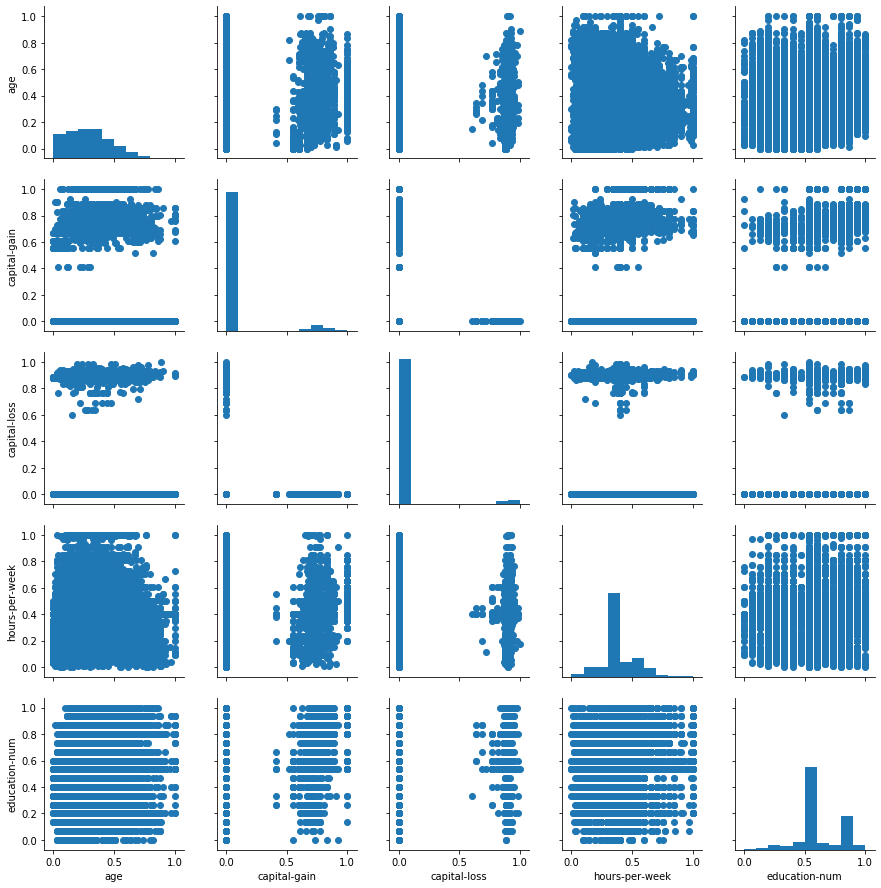

In [115]:
#for column in continues:
g = sns.PairGrid(data = data_train,vars = continues);
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [116]:
skewed = ['capital-gain','capital-loss']
for column in data_train[skewed]:
    data_train[column] = data_train[column].apply(lambda x: np.log(x+1))

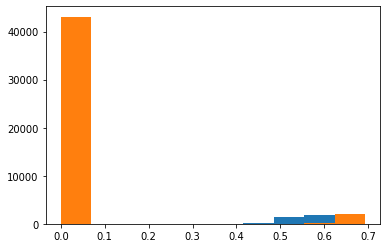

In [117]:
for column in skewed:
    plt.hist(data = data_train,x = column)

In [118]:
from sklearn.preprocessing import MinMaxScaler
#normalizing numerical features. Create function to use later on test data

def normalize(data):
    
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data[continues])
    return data

data_train[continues]= normalize(data_train)
data_train.head(100)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.737680,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.041096,Private,Some-college,0.600000,Never-married,Tech-support,Own-child,White,Female,0.000000,0.0,0.397959,United-States
96,0.164384,Private,HS-grad,0.533333,Never-married,Craft-repair,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
97,0.205479,Self-emp-inc,HS-grad,0.533333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.829585,0.0,0.397959,United-States
98,0.178082,Private,11th,0.400000,Never-married,Handlers-cleaners,Own-child,White,Male,0.000000,0.0,0.397959,United-States


In [119]:
features_final = pd.get_dummies(data_train)

In [120]:
features_final.head(1)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.30137,0.8,0.73768,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
features_final.shape

(45222, 103)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(features_final,income,test_size=0.2,random_state =42)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


In [124]:
from sklearn.ensemble import AdaBoostClassifier

### AdaBoost

In [125]:
clfA = AdaBoostClassifier()
clfA.fit(X_train,y_train)
y_pred = clfA.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
print(accuracy_score(y_test,y_pred))

0.8606965174129353


### RandomForest

In [128]:
from sklearn.ensemble import RandomForestClassifier


In [129]:
clfB = RandomForestClassifier()
clfB.fit(X_train,y_train)


/Users/itisrv/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
y_pred = clfB.predict(X_test)

In [131]:
print(accuracy_score(y_test,y_pred))

0.8405749032614704


### Support Vector Machine

In [132]:
from sklearn.svm import SVC

In [133]:
clfC = SVC()

In [134]:
clfC.fit(X_train,y_train)

/Users/itisrv/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [135]:
y_pred = clfC.predict(X_test)

In [136]:
print(accuracy_score(y_test,y_pred))

0.8369264787175235


## Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
clfD = DecisionTreeClassifier()
clfD.fit(X_train,y_train)
y_pred = clfD.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8197899391929243


### Tuning for AdaBoostClassifier

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

parameter = {'n_estimators':[200,300,500], 'learning_rate':[0.2,0.4,0.7,1]}
scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clfA,param_grid= parameter,scoring= scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clfA = grid_fit.best_estimator_

/Users/itisrv/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [140]:
income.unique()

array([0, 1])

In [145]:
y_best_pred = best_clfA.predict(X_test)

In [146]:
print(accuracy_score(y_test,y_best_pred))

0.8697622996130459


In [149]:
data_test.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [165]:
data_test.isna().sum()

age                    0
workclass              0
education_level        0
education-num          0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
capital-gain       36177
capital-loss       36177
hours-per-week         0
native-country         0
dtype: int64

In [166]:
for col in ['age','education-num','hours-per-week']:
    data_test[col] = data_test[col].fillna(data_test[col].mean())
for col in ['capital-gain', 'capital-loss']:
    data_test[col]= data_test[col].fillna(data_train[col].median())

In [167]:
for col in categorical:
    data_test[col]= data_test[col].fillna(data_train.groupby([col])[col].count().sort_values(ascending=False).index[0])
    

In [168]:
data_test.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [169]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
age                45222 non-null float64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
dtypes: float64(5), object(8)
memory usage: 4.5+ MB


In [170]:
skewed = ['capital-gain','capital-loss']
for column in data_test[skewed]:
    data_test[column] = data_test[column].apply(lambda x: np.log(x+1))

In [171]:
data_test[continues]= normalize(data_test)
data_test.head(100)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.054795,Private,10th,0.333333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,0.397959,United-States
1,0.438356,Private,Bachelors,0.800000,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,0.397959,United-States
2,0.369863,Self-emp-not-inc,Assoc-acdm,0.733333,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,1.000000,United-States
3,0.232877,Private,Bachelors,0.800000,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,0.459184,United-States
4,0.095890,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,0.397959,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.424658,Local-gov,Masters,0.866667,Separated,Prof-specialty,Not-in-family,White,Male,0.0,0.0,0.500000,United-States
96,0.315068,Local-gov,Some-college,0.600000,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,0.397959,United-States
97,0.205479,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,0.397959,United-States
98,0.095890,Private,HS-grad,0.533333,Never-married,Adm-clerical,Unmarried,White,Male,0.0,0.0,0.500000,United-States


In [172]:
data_test_final = pd.get_dummies(data_test)

In [173]:
encoded = list(data_test_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [174]:
prediction = best_clfA.predict(data_test_final)


In [175]:
data_test_final['income'] =prediction

In [176]:
data_test_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,0.054795,0.333333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.438356,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.369863,0.733333,0.0,0.0,1.000000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.232877,0.800000,0.0,0.0,0.459184,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.095890,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [182]:
data_submit = data_test_final['income']
data_submit.head()

0    0
1    1
2    0
3    1
4    0
Name: income, dtype: int64

In [191]:
data_submit = data_submit.reset_index()

In [198]:
data_submit =data_submit.rename(columns={'index':'id',0:'income'})

In [200]:
data_submit.head(100)

,id,income
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
95,95,0
96,96,0
97,97,1
98,98,0


In [201]:
data_submit.to_csv('submission.csv',index = False,header = True)